## Test d'hypothèse 1.2 : Essayer d'améliorer les images couleur en augmentant la luminosité

Dans le test 1.1, il était possible d'améliorer la netteté d'un échantillon rg plus sombre en égalisant son histogramme pour améliorer son contraste, cependant, pour une meilleure classification et distinction des autres documents, il est nécessaire d'améliorer encore la netteté de ce type d'échantillon. Dans ce test, nous vérifierons la possibilité d'améliorer la netteté de l'image en augmentant la luminosité, et pour cela nous testerons différents types de gain dans les canaux de couleur, en plus d'un test d'égalisation d'histogramme avec augmentation de la luminosité ensemble.

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [2]:
plt.style.use('ggplot')

## 1. Comparaison entre un bon et un mauvais échantillon

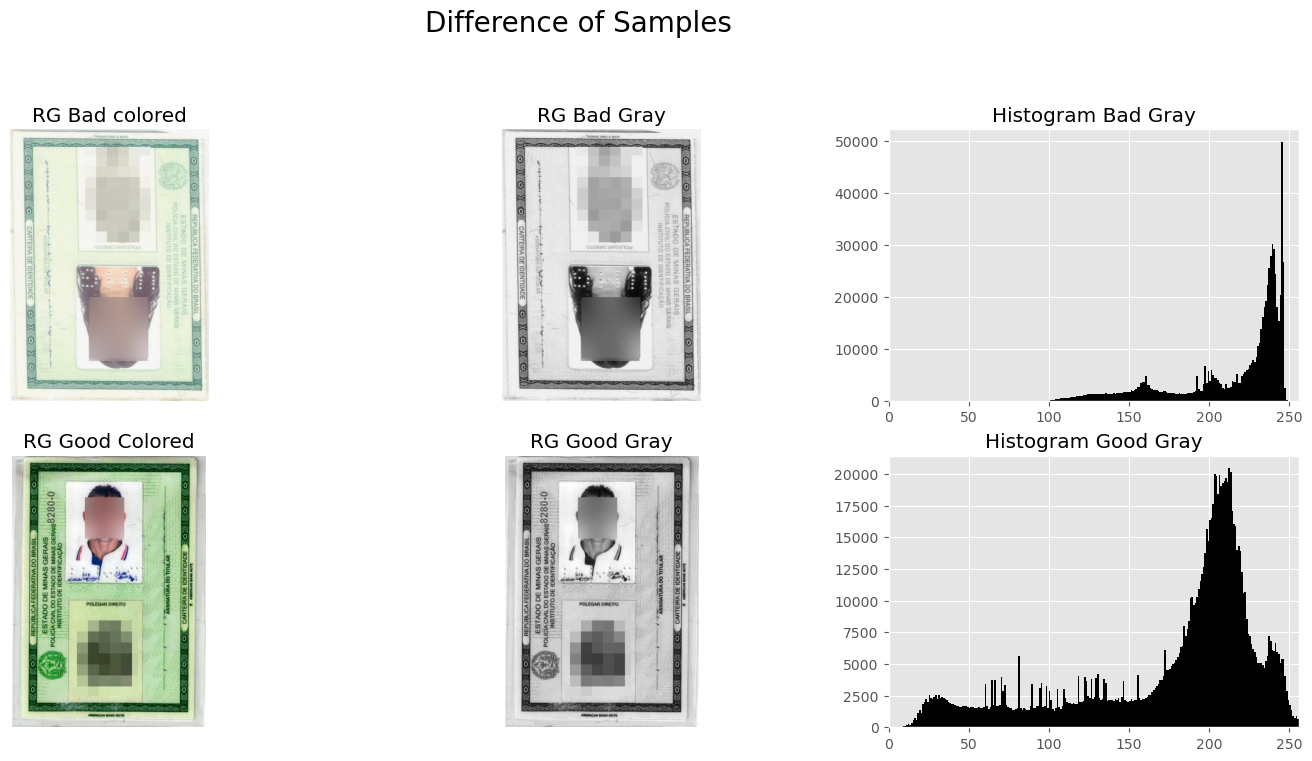

In [3]:
rg_bad = cv2.cvtColor(cv2.imread('BID-Dataset/RG_Recto/00022191_in.jpg'), cv2.COLOR_BGR2RGB)
rg_bad_gray = cv2.cvtColor(rg_bad, cv2.COLOR_RGB2GRAY)

rg_good = cv2.cvtColor(cv2.imread('BID-Dataset/RG_Recto/00022188_in.jpg'), cv2.COLOR_BGR2RGB)
rg_good_gray = cv2.cvtColor(rg_good, cv2.COLOR_RGB2GRAY)

fig = plt.figure(figsize=(18,12))

fig.add_subplot(3,3,1); plt.axis('off')
plt.title('RG Bad colored')
plt.imshow(rg_bad)

fig.add_subplot(3,3,2); plt.axis('off')
plt.title('RG Bad Gray')
plt.imshow(rg_bad_gray, cmap='gray')

fig.add_subplot(3,3,3)
plt.hist(rg_bad_gray.flatten(),256,[0,256], color = 'black')
plt.title('Histogram Bad Gray')
plt.xlim([0,256])

fig.add_subplot(3,3,4); plt.axis('off')
plt.title('RG Good Colored')
plt.imshow(rg_good)

fig.add_subplot(3,3,5); plt.axis('off')
plt.title('RG Good Gray')
plt.imshow(rg_good_gray, cmap='gray')

fig.add_subplot(3,3,6)
plt.hist(rg_good_gray.flatten(),256,[0,256], color = 'black')
plt.title('Histogram Good Gray')
plt.xlim([0,256])

fig.suptitle('Difference of Samples', fontsize=20)
plt.show();


## 2. Augmenter la luminosité de l'image

In [4]:
def plot_histograms(img, name, title):
    hist_red = cv2.calcHist(img,[0],None,[256],[0,256])
    hist_green = cv2.calcHist(img,[1],None,[256],[0,256])
    hist_blue = cv2.calcHist(img,[2],None,[256],[0,256])
    
    fig = plt.figure(figsize=(14,7))

    fig.add_subplot(2,2,1); plt.axis('off')
    plt.title(name)
    plt.imshow(img)

    fig.add_subplot(2,2,2);
    plt.title('Canal Red')
    plt.plot(hist_red,color='red',lw=2)

    fig.add_subplot(2,2,3);
    plt.title('Canal Green')
    plt.plot(hist_green,color='green',lw=2)

    fig.add_subplot(2,2,4);
    plt.title('Canal Blue')
    plt.plot(hist_blue,color='blue',lw=2)

    fig.suptitle(title, fontsize=20)
    plt.show();

## 2.1 Gain linéaire avec rapport en pourcentage

In [5]:
def increase_brightness_linear_percent(img, gain):
    r, g, b = cv2.split(img)
    return cv2.merge((r+(gain*0.2989), g+(gain*0.5870), b+(gain*0.1140))).astype('uint8')

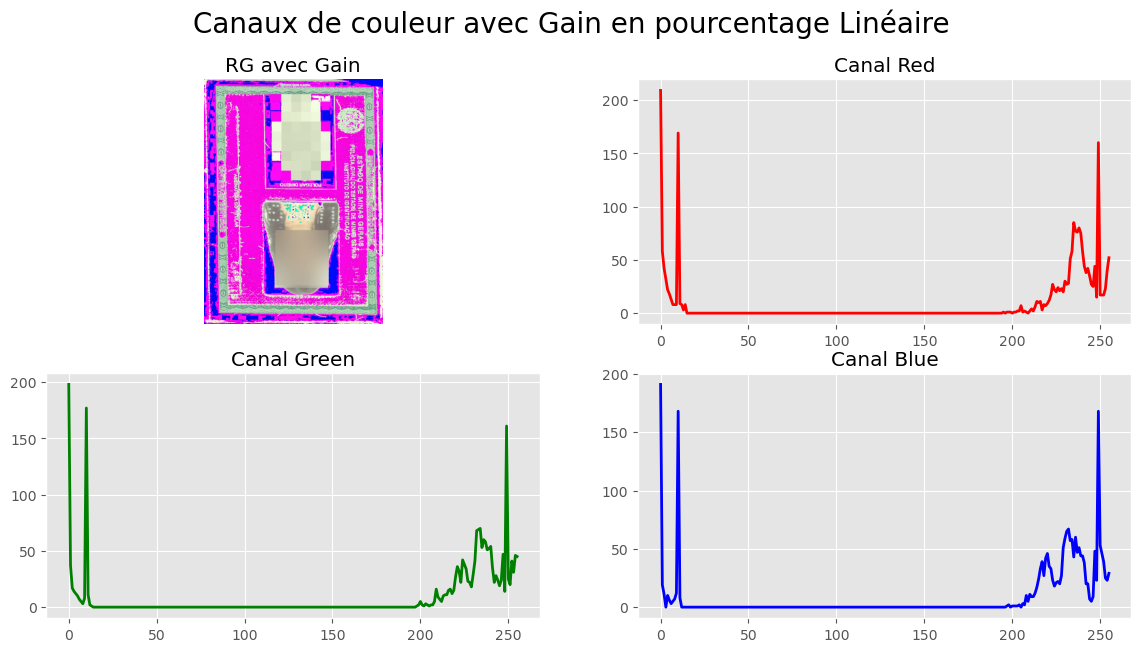

In [6]:
rg_lp = increase_brightness_linear_percent(rg_bad, 35)
plot_histograms(rg_lp, 'RG avec Gain', 'Canaux de couleur avec Gain en pourcentage Linéaire')

## 2.2 Gain linéaire

In [7]:
def increase_brightness_linear(img, gain):
    r, g, b = cv2.split(img)
    return cv2.merge((r+gain, g+gain, b+gain)).astype('uint8')

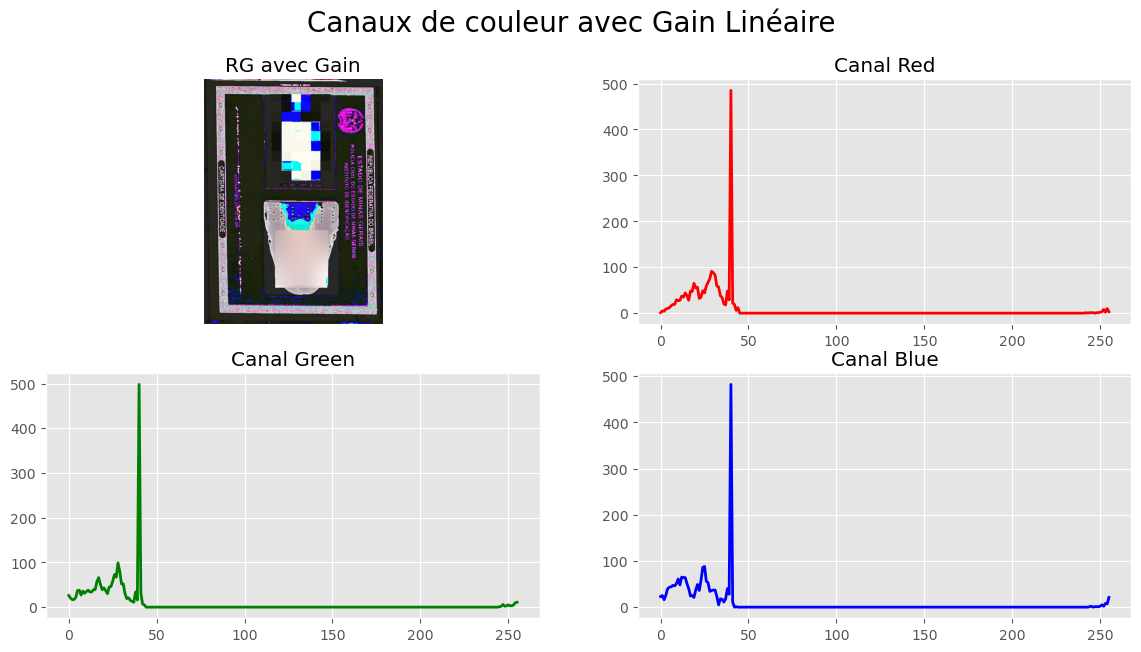

In [8]:
rg_l = increase_brightness_linear(rg_bad, 50)
plot_histograms(rg_l, 'RG avec Gain','Canaux de couleur avec Gain Linéaire')

## 2.3 Gain en pourcentage

In [9]:
def increase_brightness_percent(img, percent):
    r, g, b = cv2.split(img)
    return cv2.merge((r*(percent*1.002989), g*(percent*1.005870), b*(percent*1.001140))).astype('uint8')

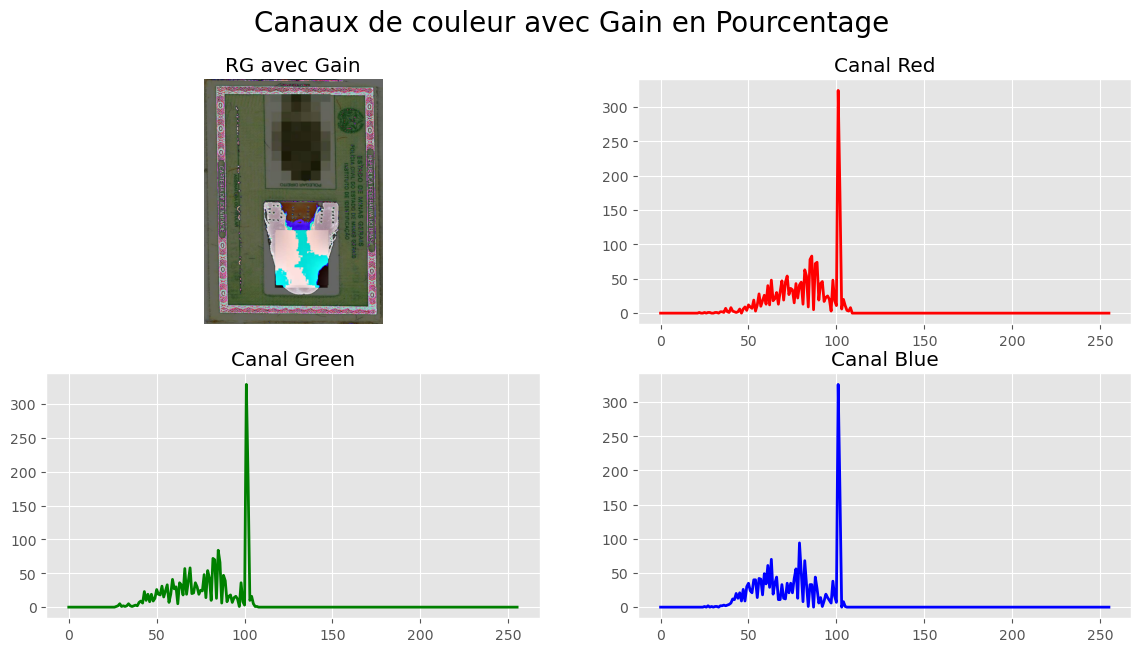

In [10]:
rg_p = increase_brightness_percent(rg_bad, 1.45)
plot_histograms(rg_p, 'RG avec Gain', 'Canaux de couleur avec Gain en Pourcentage')

## 3.Comparaisons

In [11]:
documents = {
    'rg_bad' : {'matrice' : rg_bad},
    'rg_good' : {'matrice' : rg_good},
    'rg_lp': {'matrice' : rg_lp},
    'rg_l' : {'matrice' : rg_l},
    'rg_p' : {'matrice' : rg_p}
}

In [12]:
for key, value in documents.items():
    documents[key]['hist_red'] = cv2.calcHist(documents[key]['matrice'],[0],None,[256],[0,256])
    documents[key]['hist_green'] = cv2.calcHist(documents[key]['matrice'],[1],None,[256],[0,256])
    documents[key]['hist_blue'] = cv2.calcHist(documents[key]['matrice'],[2],None,[256],[0,256])

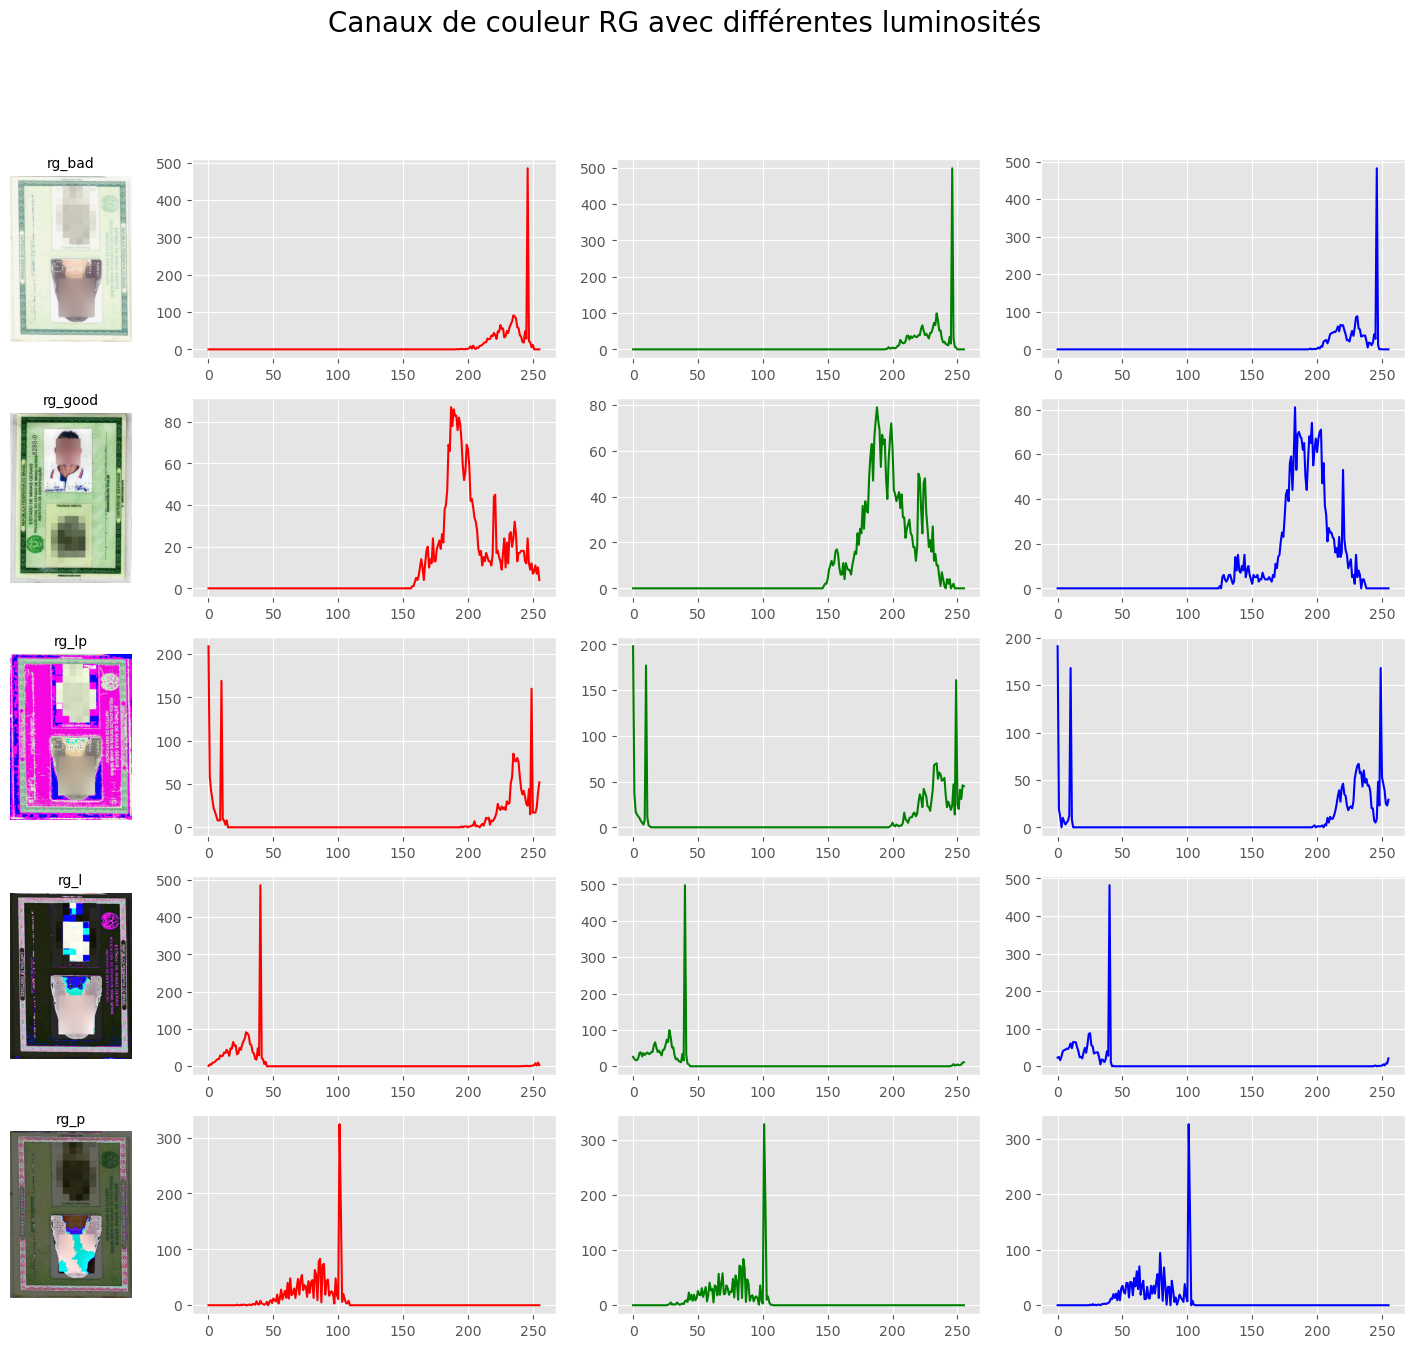

In [13]:
n = len(documents.keys())
fig , ax = plt.subplots(n, 4, figsize=(18,3*n), gridspec_kw={'width_ratios': [1,3,3,3]})

cont = 0
ax.flatten()
ax = ax.T.flatten()
for key, value in documents.items():
    ax[0+(cont)].imshow(value['matrice']); 
    ax[0+(cont)].axis('off'); ax[0+(cont)].set_title(key,fontsize=10)

    ax[n+(cont)].plot(value['hist_red'], color='red');
    ax[n*2+(cont)].plot(value['hist_green'], color='green')
    ax[n*3+(cont)].plot(value['hist_blue'], color='blue')
    cont+=1
    
fig.suptitle('Canaux de couleur RG avec différentes luminosités', fontsize=20)
plt.show()

## 4. CLAHE EQ avec augmentation de la luminosité en pourcentage

In [14]:
def clahe_func(img):
    r, g, b = cv2.split(img)
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
    red = clahe.apply(r)
    green = clahe.apply(g)
    blue = clahe.apply(b)
    return cv2.merge((red, green, blue))

### 4.1 Gain en pourcentage appliqué à l'égalisation CLAHE

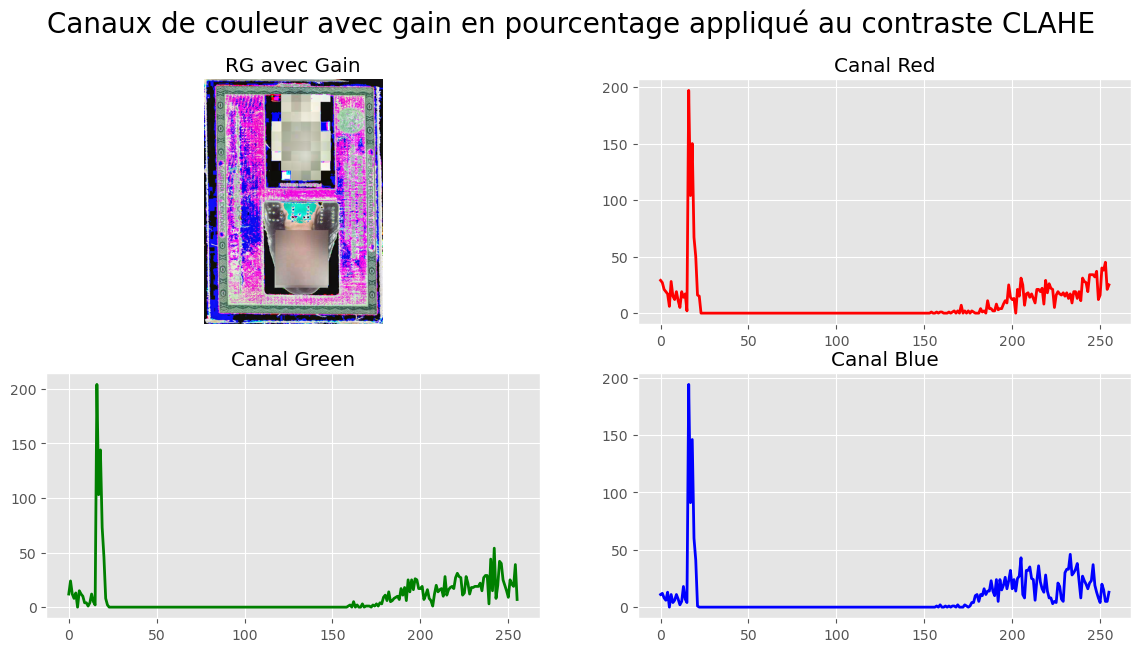

In [16]:
rg_clahe = clahe_func(rg_bad)
rg_p = increase_brightness_percent(rg_clahe, 1.1)
plot_histograms(rg_p, 'RG avec Gain', 'Canaux de couleur avec gain en pourcentage appliqué au contraste CLAHE')

## 4.2 Égalisation CLAHE appliquée au gain en pourcentage

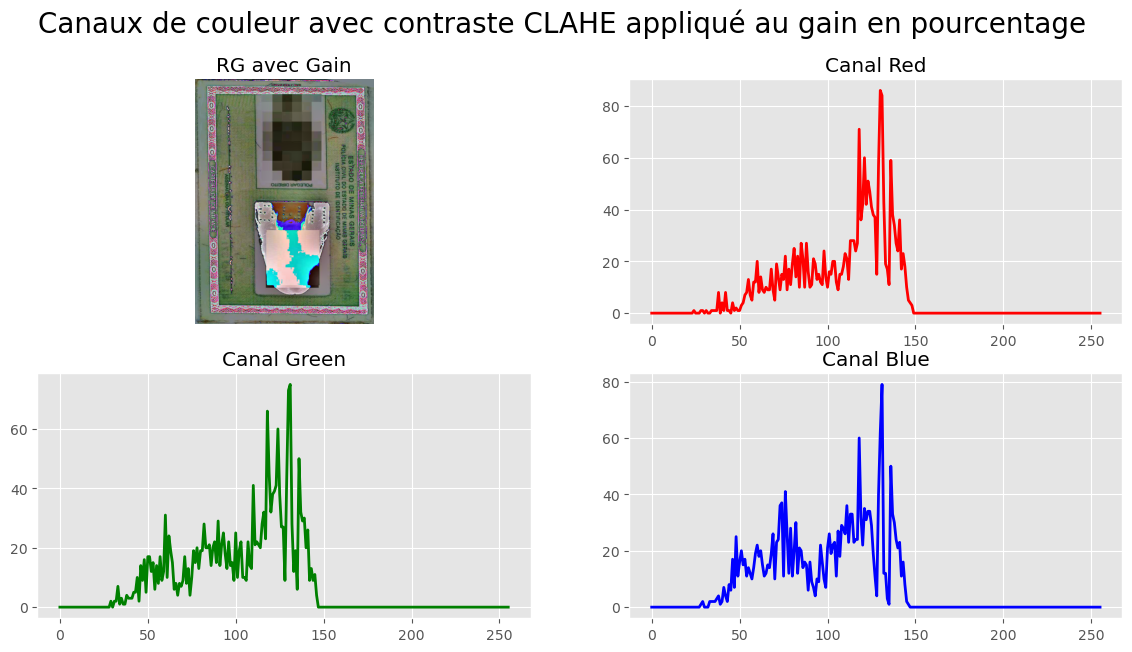

In [17]:
rg_p = increase_brightness_percent(rg_bad, 1.45)
rg_clahe = clahe_func(rg_p)
plot_histograms(rg_clahe, 'RG avec Gain', 'Canaux de couleur avec contraste CLAHE appliqué au gain en pourcentage')

### Conclusions

Dans ce test, nous avons vérifié les résultats des différentes méthodes d'augmentation de la luminosité, parmi lesquelles la méthode d'augmentation du pourcentage de luminosité s'est démarquée. Un autre résultat intéressant a été l'utilisation de l'égalisation CLAHE appliquée au pourcentage d'augmentation de la luminosité, où la différenciation des couleurs était plus grande et la netteté de la luminosité était plus faible, ce qui se traduisait par des canaux de couleur plus étalés. La méthode d'augmentation du pourcentage de luminosité est très sensible aux valeurs d'entrée de la fonction, car dans son calcul, il y a la multiplication de chaque canal de couleur en x * pourcentage * le poids du canal référé dans sa composition pour la visualisation humaine, de cette manière, s'il est utilisé dans l'échelle, le pourcentage doit être bien ajusté. Avec l'ajout de l'égalisation, nous sommes plus confiants que les canaux de couleur ne seront pas aussi saturés, tout en obtenant une bonne correction dans le balayage sombre de l'image avec des canaux de couleur plus représentatifs.